# Wrangle: [testfit.io](https://blog.testfit.io/)

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
pd.set_option("display.max_columns", None)
plt.rc("figure", figsize=(16, 8))

## Stakeholder Notes
- Work with Commitments
- Activity Descriptions == New Construction, SubRehab, Additions, and Improvements
- Loan amount >= $1M:
    - Mortgage at time of Firm Commitment Issuance, Amendment or Reissuance?
    - Mortgage at Firm Commitment Issuance?
    - Final Mortgage Amount? **Probably this one...**
- Market == Large urban centers; meaning **cities** not just states; not rural one-off projects
- Types of FHA loan is irrelevant

In [3]:
# commitments
df  = pd.read_excel("Initi_Endores_Firm Comm_DB_FY06_FY20_Q2.xlsx", sheet_name="Firm Cmtmts, Iss'd and Reiss'd", header=6)
print(df.shape)
df.head()

(20918, 29)


,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,Activity Group,Facility Type,Program Designation,Firm Commitment Activity,Lender at Firm Commitment Activity,"Mortgage at time of Firm Commitment Issuance, Amendment or Reissuance",Unit or Bed Count,Date of Firm Commitment Activity,Fiscal Year of Firm Commitment Activity,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Fiscal Year of Firm Commitment,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Mortgage Amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,277600,48,2005-10-01,2006,277600,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,173000,88,2005-10-01,2006,173000,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,GREYSTONE SERVICING COMPANY LLC,3886800,120,2005-10-03,2006,3886800,2005-10-03,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,Firm Issued,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,4000000,2005-10-03,2006,TAP,Y,0,0,0,0,0,0,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,REILLY MORTGAGE GRP,5129000,241,2005-10-04,2006,5129000,2005-10-04,2006,TAP,0,0,0,0,0,0,0,Firm Expired,5247700


In [4]:
df["Activity Description"].value_counts()

Refinance           16129
New Construction     2479
SubRehab             1430
Purchase              599
Additions             149
Improvements          119
Operating Loss         13
Name: Activity Description, dtype: int64

In [5]:
df.to_csv("hud_commitments.csv")

In [6]:
df.rename(columns={"Activity Group": "activity_group"}, inplace=True)

In [7]:
# activity_groups
# df = df[(df.activity_group == "NC/SR") | (df.activity_group == "Imp/Adds")]

In [8]:
# df = df[df["Final Mortgage Amount"] >= 1000000]
# df.head()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20918 entries, 0 to 20917
Data columns (total 29 columns):
 #   Column                                                                 Non-Null Count  Dtype         
---  ------                                                                 --------------  -----         
 0   FHA Number                                                             20918 non-null  int64         
 1   Project Name                                                           20918 non-null  object        
 2   Project City                                                           20918 non-null  object        
 3   Project State                                                          20918 non-null  object        
 4   Basic FHA, Risk Share or Other                                         20918 non-null  object        
 5   Program Category                                                       20918 non-null  object        
 6   Activity Description          

In [10]:
df["Activity Description"].value_counts()

Refinance           16129
New Construction     2479
SubRehab             1430
Purchase              599
Additions             149
Improvements          119
Operating Loss         13
Name: Activity Description, dtype: int64

In [11]:
df["activity_group"].value_counts()

Refi/ Pchse     16696
NC/SR            3934
Impv/Adds         275
Operatg Loss       13
Name: activity_group, dtype: int64

In [12]:
df.rename(columns={"Facility Type": "facility_type"}, inplace=True)

In [13]:
df.facility_type.value_counts()

Apts/Coops                            7427
Apts                                  6353
Nursing/ICF                           3811
Asst'd Livg                           1692
Coop/Apts/Mobile Home Pk/ALF          1231
Coop                                   143
Board & Care                           114
Hospital                               104
232 Health Care-NH/ICF, ALF or B&C      35
Mobile Home Pk                           5
SRO                                      3
Name: facility_type, dtype: int64

In [14]:
df.rename(columns={"FHA Number": "fha_number"}, inplace=True)

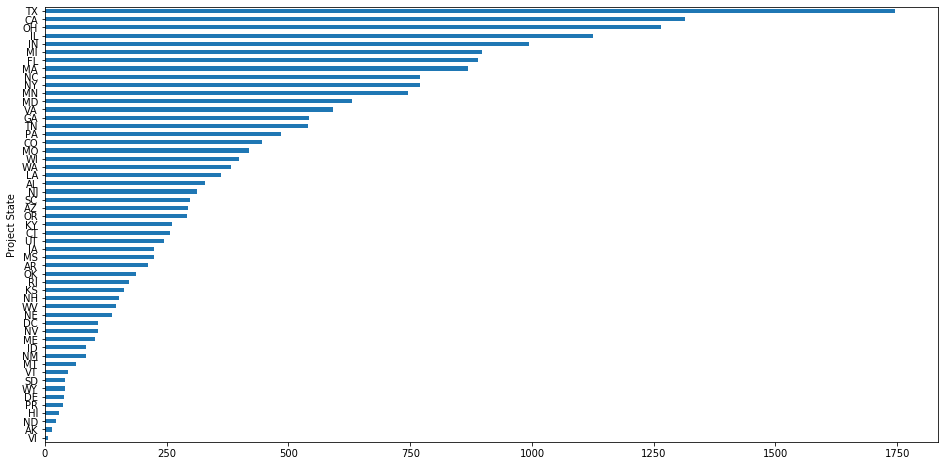

In [15]:
df.groupby(["Project State"]).fha_number.count().sort_values().plot.barh()
plt.show()

In [16]:
df[df["Final Mortgage Amount"] >= 1000000].shape

(20241, 29)

In [17]:
df.rename(columns={"Final Mortgage Amount": "final_mortgage"}, inplace=True)

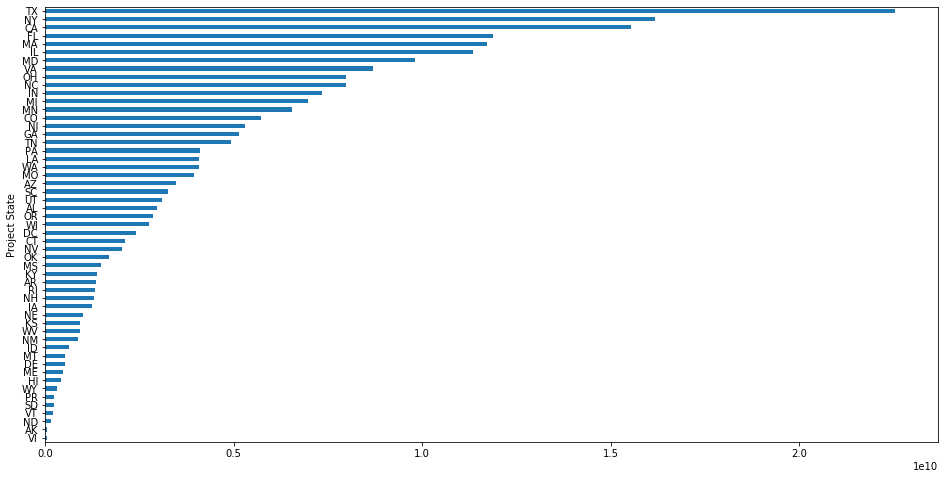

In [18]:
df.groupby(["Project State"]).final_mortgage.sum().sort_values().plot.barh()

In [19]:
df["Project City"].value_counts().head(20)

Chicago         346
Indianapolis    259
Columbus        173
Los Angeles     147
Houston         140
Boston          131
San Antonio     126
Baltimore       125
Dallas          113
Atlanta         113
Washington      104
New York         96
Denver           95
Cleveland        90
Portland         89
St. Louis        88
Cincinnati       84
Austin           83
Minneapolis      81
Richmond         78
Name: Project City, dtype: int64

In [20]:
df.groupby(["Project City", "Fiscal Year of Firm Commitment"]).size().sort_values()

Project City     Fiscal Year of Firm Commitment
 Corpus Christi  2012                               1
New Square       2013                               1
New Ulm          2006                               1
                 2008                               1
                 2014                               1
                                                   ..
Indianapolis     2012                              37
                 2011                              37
Chicago          2011                              43
                 2012                              45
                 2013                              46
Length: 12612, dtype: int64

In [21]:
df.groupby(["Project City", "Fiscal Year of Firm Commitment"])["final_mortgage"].sum().sort_values()

Project City  Fiscal Year of Firm Commitment
roxbury       2010                                      1
Aurora        2007                                  70100
Wolcottville  2017                                 114000
Covington     2006                                 125000
Cordele       2008                                 145000
                                                  ...    
Chicago       2011                              494045600
              2012                              520309300
New York      2013                              647062504
Trenton       2009                              760934400
Bronx         2013                              822430600
Name: final_mortgage, Length: 12612, dtype: int64

In [22]:
df[df["Project City"] == "Austin"].groupby("Fiscal Year of Firm Commitment")["final_mortgage"].sum()

Fiscal Year of Firm Commitment
2006     14083843
2007     21885300
2008      2635000
2009     18128300
2010     94857100
2011     28475900
2012     80729000
2013    276402300
2014    111088600
2015     69636500
2016     68436400
2017    142180000
2018    304965500
2019     74686900
2020    170281700
Name: final_mortgage, dtype: int64

In [23]:
df[df["Project City"] == "Minneapolis"].groupby("Fiscal Year of Firm Commitment")["final_mortgage"].sum()

Fiscal Year of Firm Commitment
2006     14121493
2007      4867400
2008     20531200
2009     22799500
2010     65656000
2011     89888142
2012    109929200
2013    120484104
2014    109086280
2015     72991300
2016     64554600
2017     86419600
2018     62178200
2019     36570200
Name: final_mortgage, dtype: int64

In [24]:
# csv works and can be read
df = pd.read_csv("hud_commitments.csv", index_col=0)
df.head()

,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,Activity Group,Facility Type,Program Designation,Firm Commitment Activity,Lender at Firm Commitment Activity,"Mortgage at time of Firm Commitment Issuance, Amendment or Reissuance",Unit or Bed Count,Date of Firm Commitment Activity,Fiscal Year of Firm Commitment Activity,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Fiscal Year of Firm Commitment,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Mortgage Amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,277600,48,2005-10-01,2006,277600,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,173000,88,2005-10-01,2006,173000,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,GREYSTONE SERVICING COMPANY LLC,3886800,120,2005-10-03,2006,3886800,2005-10-03,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,Firm Issued,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,4000000,2005-10-03,2006,TAP,Y,0,0,0,0,0,0,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,REILLY MORTGAGE GRP,5129000,241,2005-10-04,2006,5129000,2005-10-04,2006,TAP,0,0,0,0,0,0,0,Firm Expired,5247700


In [25]:
df[df["Project City"] == "Austin"].groupby("Fiscal Year of Firm Commitment")["Final Mortgage Amount"].sum()

Fiscal Year of Firm Commitment
2006     14083843
2007     21885300
2008      2635000
2009     18128300
2010     94857100
2011     28475900
2012     80729000
2013    276402300
2014    111088600
2015     69636500
2016     68436400
2017    142180000
2018    304965500
2019     74686900
2020    170281700
Name: Final Mortgage Amount, dtype: int64

In [26]:
df[df["Project City"] == "Austin"].groupby("Fiscal Year of Firm Commitment")["Final Mortgage Amount"].count()

Fiscal Year of Firm Commitment
2006     1
2007     2
2008     1
2009     1
2010     8
2011     3
2012     8
2013    17
2014     6
2015     5
2016     5
2017     8
2018    10
2019     4
2020     4
Name: Final Mortgage Amount, dtype: int64

In [27]:
df[df["Project City"] == "Austin"].groupby("Fiscal Year of Firm Commitment")["Final Mortgage Amount"].size()

Fiscal Year of Firm Commitment
2006     1
2007     2
2008     1
2009     1
2010     8
2011     3
2012     8
2013    17
2014     6
2015     5
2016     5
2017     8
2018    10
2019     4
2020     4
Name: Final Mortgage Amount, dtype: int64

In [28]:
df.shape

(20918, 29)